In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Variable Delay Branch
k_variable_holders = []

with h5.File("C:/Users/haoyuan/Desktop/Research/Projects/Split Delay Design/instability_shear_fix.h5", 'r') as source:
    name_list = list(source.keys())
    for k in list(source.keys()):
        print(k)
        k_variable_holders.append(np.array(source[k]))

var branch x axis
var branch y axis
var branch z axis


# Get the unperturbed wave vector

In [3]:
k0_var = k_variable_holders[0][100]
print(k0_var)

[-5.19319973e-04 -7.28419045e-06  5.06773076e+04]


# Calculate the momentum difference

In [5]:
k_var = np.stack(k_variable_holders)
k_var_diff = k_var - k0_var[np.newaxis, np.newaxis, :]

# Fit the Deviation Matrix

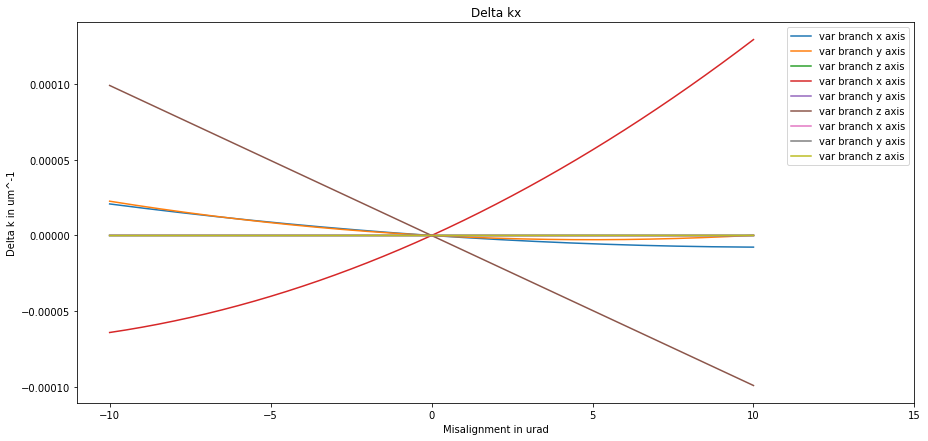

In [7]:
plt.figure(figsize=(15, 7))

for y in range(3):
    for x in range(3):
        plt.plot(np.arange(-100, 101) / 10., k_var_diff[x, :, y] / k0_var[-1] * 1e6, label=name_list[x])

plt.xlim([-11, 15])

plt.ylabel("Delta k in um^-1")
plt.xlabel("Misalignment in urad")
plt.title("Delta kx")

plt.legend()
plt.show()

In [10]:
gradient_fix_holder = np.zeros((3, 3))

angles = np.arange(-100, 101) / 10.  # urad

for x in range(3):
    for y in range(3):
        
        # Linear fit slope
        slope, intercept, r_value, p_value, std_err = linregress(angles, k_var_diff[x, :, y])

        # Slope through the origin
        slope_o = np.dot(angles, k_var_diff[x, :, y]) / np.dot(angles, angles)
        
        #print(slope - slope_o)
        
        gradient_fix_holder[y, x] = slope_o

In [14]:
gradient_var_holder = np.zeros((3, 3))

angles = np.arange(-100, 101) / 10.  # urad

for x in range(3):
    for y in range(3):
        
        # Linear fit slope
        slope, intercept, r_value, p_value, std_err = linregress(angles, k_var_diff[x, :, y])

        # Slope through the origin
        slope_o = np.dot(angles, k_var_diff[x, :, y]) / np.dot(angles, angles)
        
        #print(slope - slope_o)
        
        gradient_var_holder[y, x] = slope_o

In [15]:
print(gradient_var_holder.T)

[[-7.22933343e-08  4.90241754e-07 -1.47030040e-10]
 [-5.70568308e-08 -1.34537781e-10  6.83834645e-14]
 [ 2.14822636e-11 -5.02147749e-07  1.50519424e-10]]


In [16]:
print(gradient_var_holder[0,0] * 10 / k0_var[-1] * 1e6)

-1.4265425252375803e-05
